# (Figure2)-Infiltration Characteristics of NK/T cells in Gastric Mucosal with H. pylori Infection.

In [129]:
import omicverse as ov 
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
import pandas as pd 

In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)


In [17]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [18]:
adata = sc.read_h5ad('Gastric/Data/Gastric_NKT_anno_new.h5ad')
adata = adata[adata.obs['T/NK_celltype']!='CD4.Tem']
adata

View of AnnData object with n_obs × n_vars = 13867 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
adata_raw

AnnData object with n_obs × n_vars = 13867 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_T', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
type_color_rna={
    'CD8.Mait':'#81B330',
    'CD8.Tem':'#249F3A',
    'CD8.Trm':'#0A5D2F',
    'CD8.Tea':'#BCCE85',
    'CD4.Treg':'#F3C5C7',
    'CD4.Trm':'#E1635E',
    'CD4.Tfh':'#89428F',
    'CD4.Tn':'#F2BC1D',
    'CD4.Th17':'#D41661',
    'NK.CD56_Bright':'#31829F',
    'NK.CD56_Dim':'#6BBBDA',
    'Cycling.T':'#4D4F95'
}
adata.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()
adata_raw.uns['T/NK_celltype_colors']=adata_raw.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


In [7]:
adata.uns['T/NK_celltype_colors']

['#89428F',
 '#D41661',
 '#F2BC1D',
 '#F3C5C7',
 '#E1635E',
 '#81B330',
 '#BCCE85',
 '#249F3A',
 '#0A5D2F',
 '#4D4F95',
 '#31829F',
 '#6BBBDA']

In [8]:
set(adata.obs['T/NK_celltype'])

{'CD4.Tfh',
 'CD4.Th17',
 'CD4.Tn',
 'CD4.Treg',
 'CD4.Trm',
 'CD8.Mait',
 'CD8.Tea',
 'CD8.Tem',
 'CD8.Trm',
 'Cycling.T',
 'NK.CD56_Bright',
 'NK.CD56_Dim'}

# Preprocess

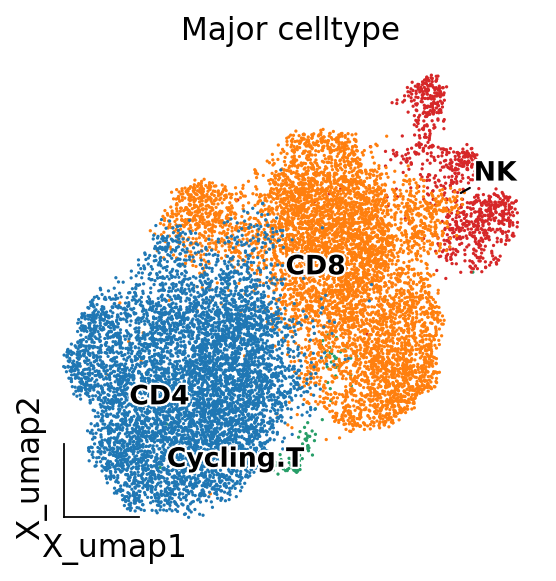

In [81]:
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['T/NK_type'],
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax
                 )

ov.pl.embedding_adjust(
    adata,
    groupby='T/NK_type',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)
ax.set_title('Major celltype')
plt.savefig("Gastric/Figure/Figure2/Figure2_A.png",dpi=300,bbox_inches = 'tight')

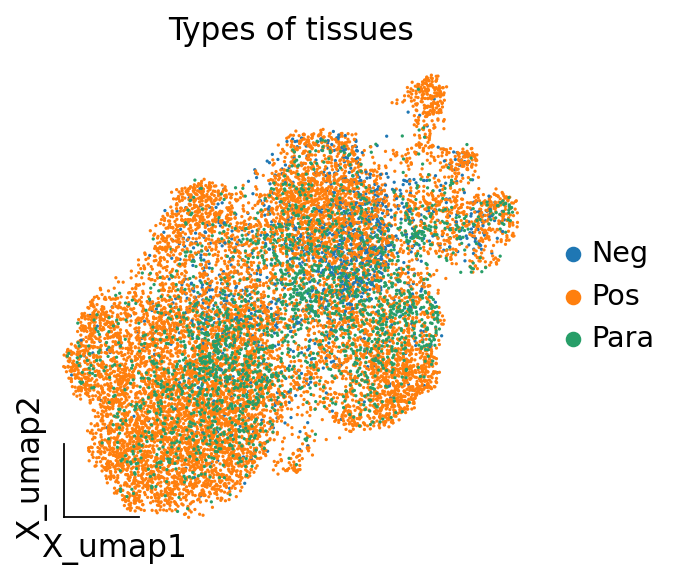

In [10]:
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(adata,
                basis='X_umap',
                color=['Sample'],
                title='Sample type',
                frameon='small',
                show=False,
                ax=ax)
ax.set_title('Types of tissues')

plt.savefig("Figure/Figure2/Figure2_B.png",dpi=300,bbox_inches = 'tight')

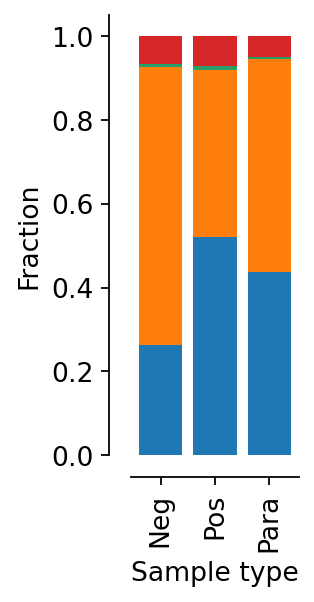

In [11]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='T/NK_type',
                    visual_clusters='Sample',
                    visual_name='Sample type',figsize=(2.2,4))
plt.ylabel('Fraction',fontsize=12)
plt.savefig("Gastric/Figure/Figure2/Figure2_C.png",dpi=300,bbox_inches = 'tight')

In [18]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga

In [19]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [20]:
import anndata as ad
adata_concat = ad.concat([adata_CD4,adata_CD8])
adata_concat
adata_concat.uns['unsig_roe_results'] = ''
roe = ov.utils.roe(adata_concat,sample_key='Sample',cell_type_key='Subcelltype_ID_type',expected_value_threshold=0)
roe

chi2: 1957.3187880513672, dof: 44, pvalue: 0.0


Sample,Neg,Pos,Para
cluster,,,
C1.CD4.Tn,0.317556,1.158966,0.763137
C1.CD8.GZMK+.Tn,0.220550,1.083349,1.134859
C2.CD4.TNF+.T,1.122760,0.769705,1.875153
C2.CD8.GZMK+.early_Tem,0.351666,1.129391,0.864254
C3.CD4.CAPG+.Tm,1.100641,1.034716,0.794870
C3.CD8.GZMK+.Tem,1.117690,0.676091,2.264676
C4.CD4.CAPG+CREM-.Tm,1.668892,0.755888,1.596641
C4.CD8.CXCL13+.Termianl_Tex,0.299065,1.246442,0.413428
C5.CD4.TMP1+.Tm,0.984337,0.935463,1.276011


In [21]:
dict(zip(adata_CD4.obs['Subcelltype_ID_type'].cat.categories, adata_CD4.uns['Subcelltype_colors']))

{'C1.CD4.Tn': '#BCCE85',
 'C6.CD4.ADSL+.Tn': '#81B330',
 'C2.CD4.TNF+.T': '#249F3A',
 'C5.CD4.TMP1+.Tm': '#0A5D2F',
 'C4.CD4.CAPG+CREM-.Tm': '#89428F',
 'C3.CD4.CAPG+.Tm': '#c69bc6',
 'C9.CD4.IL26+.Th17': '#F2BC1D',
 'C7.CD4.IL21+.Tfh': '#6BBBDA',
 'C8.CD4.TOX2+.Tfh': '#31829F',
 'C10.CD4.LAG3+.Treg': '#D41661',
 'C11.CD4.TNFRSF9+.Treg': '#4D4F95'}

In [22]:
adata_CD4.obs['Subcelltype_ID_type'].cat.categories

Index(['C1.CD4.Tn', 'C6.CD4.ADSL+.Tn', 'C2.CD4.TNF+.T', 'C5.CD4.TMP1+.Tm',
       'C4.CD4.CAPG+CREM-.Tm', 'C3.CD4.CAPG+.Tm', 'C9.CD4.IL26+.Th17',
       'C7.CD4.IL21+.Tfh', 'C8.CD4.TOX2+.Tfh', 'C10.CD4.LAG3+.Treg',
       'C11.CD4.TNFRSF9+.Treg'],
      dtype='object')

In [23]:
CD4_dict = dict(zip(adata_CD4.obs['Subcelltype_ID_type'].cat.categories, adata_CD4.uns['Subcelltype_colors']))
CD8_dict = dict(zip(adata_CD8.obs['Subcelltype_ID_type'].cat.categories, adata_CD8.uns['Subcelltype_colors']))
CD4_dict.update(CD8_dict)

In [10]:
CD4_dict

{'C1.CD4.Tn': '#BCCE85',
 'C6.CD4.ADSL+.Tn': '#81B330',
 'C2.CD4.TNF+.T': '#249F3A',
 'C5.CD4.TMP1+.Tm': '#0A5D2F',
 'C4.CD4.CAPG+CREM-.Tm': '#89428F',
 'C3.CD4.CAPG+.Tm': '#c69bc6',
 'C9.CD4.IL26+.Th17': '#F2BC1D',
 'C7.CD4.IL21+.Tfh': '#6BBBDA',
 'C8.CD4.TOX2+.Tfh': '#31829F',
 'C10.CD4.LAG3+.Treg': '#D41661',
 'C11.CD4.TNFRSF9+.Treg': '#4D4F95',
 'C1.CD8.GZMK+.Tn': '#91C79D',
 'C2.CD8.GZMK+.early_Tem': '#8FC155',
 'C3.CD8.GZMK+.Tem': '#56AB56',
 'C4.CD8.CXCL13+.Termianl_Tex': '#2D5C33',
 'C5.CD8.FOS+JUN+.T-early_response': '#F0C3C3',
 'C6.CD8.FOS+IL7R+.T-early_response': '#E07370',
 'C7.CD8.ISG+.T': '#CB3E35',
 'C8.CD8.MAIT': '#A22E2A',
 'C10.CD8.ZNF683+CXCR6-.Trm': '#347862',
 'C9.CD8.ZNF683+CXCR6+.Trm': '#6BBBA0',
 'C12.CD8.ZNF683-CXCR6+.Trm': '#81C0DD',
 'C11.CD8.KLRD1+TYROBP+.NK-like': '#3E8CB1'}

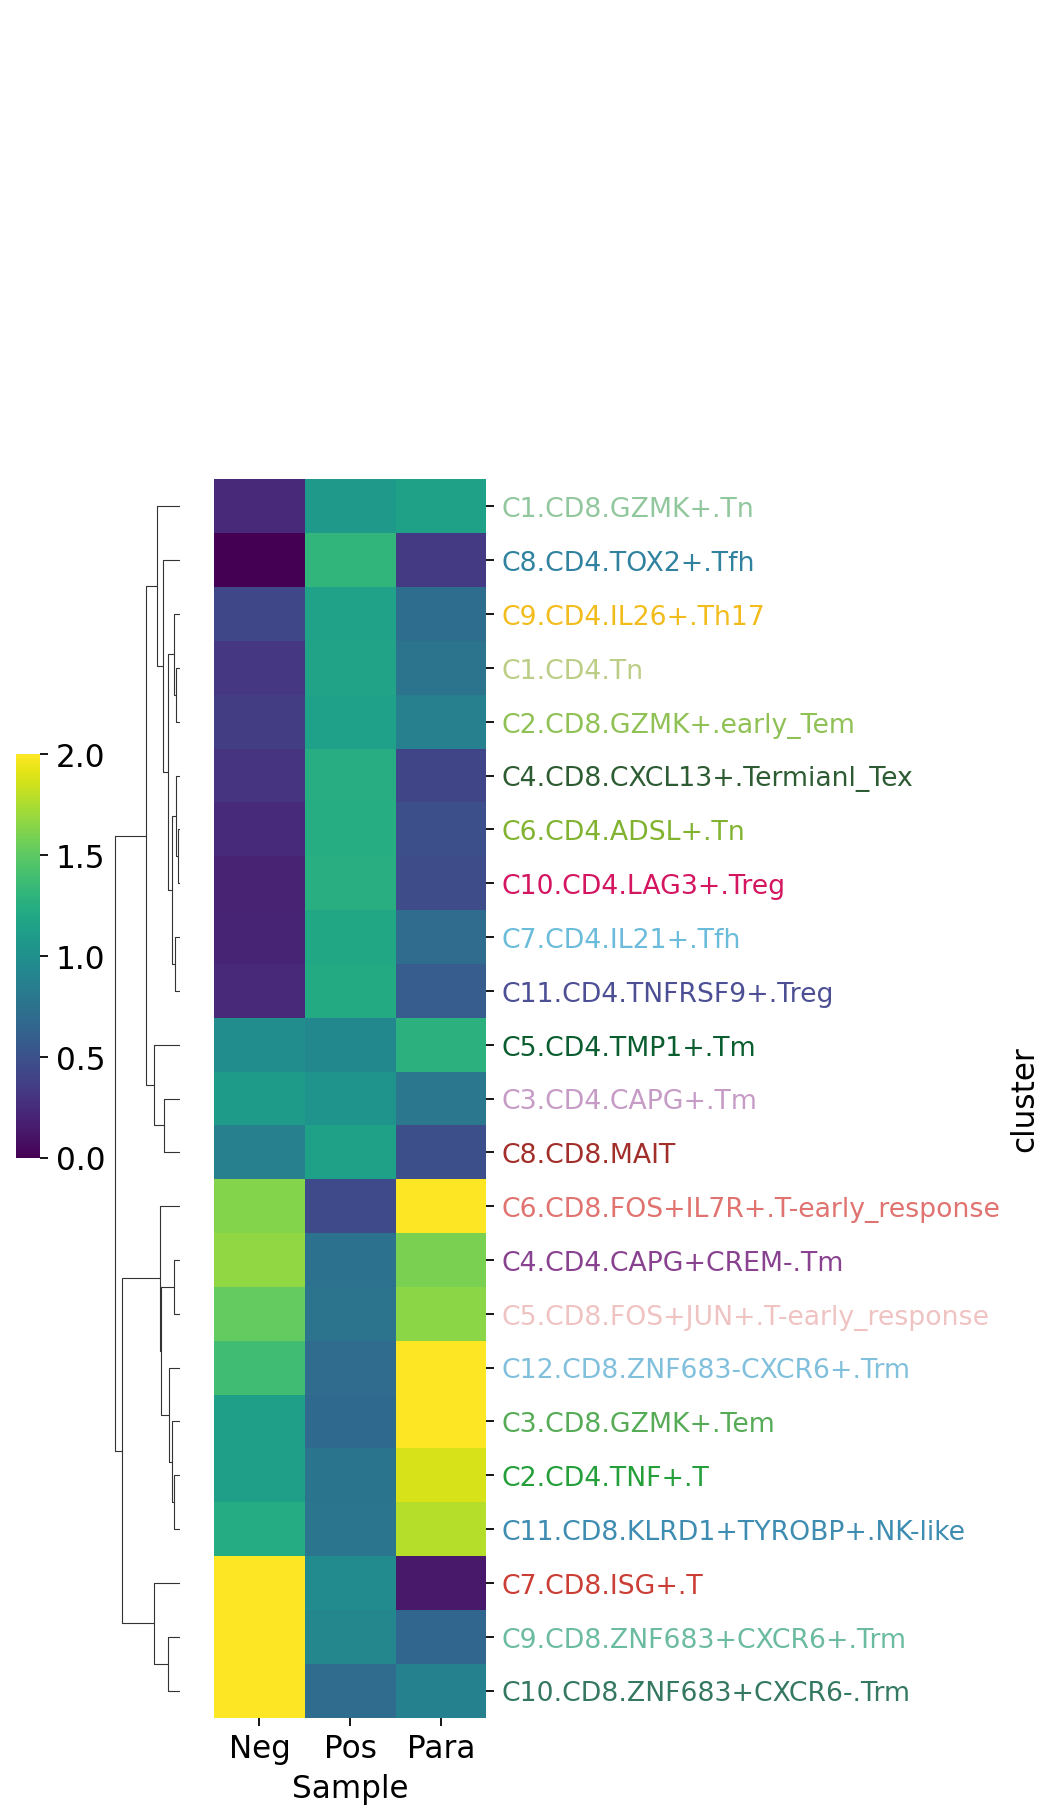

In [180]:
roe[roe>2]=2
label_colors = CD4_dict
g = sns.clustermap(roe, 
               method='average', 
               metric='euclidean', 
               cmap='viridis', col_cluster=False,
               figsize=(3, 14),
               linewidths=0,cbar_pos=(-0.02, 0.4, 0.05, 0.18),
               annot=False)
# 更改 y 轴标签颜色
for label in g.ax_heatmap.get_yticklabels():
    label_text = label.get_text()
    if label_text in label_colors:
        label.set_color(label_colors[label_text])
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize='12') 
plt.savefig("Gastric/Figure/Figure2/Figure2_D.png",dpi=300,bbox_inches = 'tight')

In [168]:
help(sns.clustermap)

Help on function clustermap in module seaborn.matrix:

clustermap(data, *, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data : 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters. See
        :func:`scipy.cluster.hierarchy.linkage` documentation for more
        information.
    metric : str, optional
        Distance metric to use for the da

# Subcelltype

In [126]:
adata_CD8 = sc.read_h5ad('Data/NKT/CD8_anno_new.h5ad')
adata_CD8


AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [139]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4',
    'CD8.FOS+IL7R+.T-early_response':'C6',
    'CD8.FOS+JUN+.T-early_response':'C5',
    'CD8.GZMK+.Tem':'C3',
    'CD8.GZMK+.Tn':'C1',
    'CD8.GZMK+.early_Tem':'C2',
    'CD8.ISG+.T':'C7',
    'CD8.KLRD1+TYROBP+.NK-like':'C11',
    'CD8.MAIT':'C8',
    'CD8.ZNF683+CXCR6+.Trm':'C9',
    'CD8.ZNF683+CXCR6-.Trm':'C10',
    'CD8.ZNF683-CXCR6+.Trm':'C12',
}
adata_CD8.obs['Subcelltype_ID']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

In [144]:
help(ov.pl.contour)

Help on function contour in module omicverse.pl._single:

contour(ax, adata, groupby, clusters, basis='X_umap', grid_density=100, contour_threshold=0.1, **kwargs)



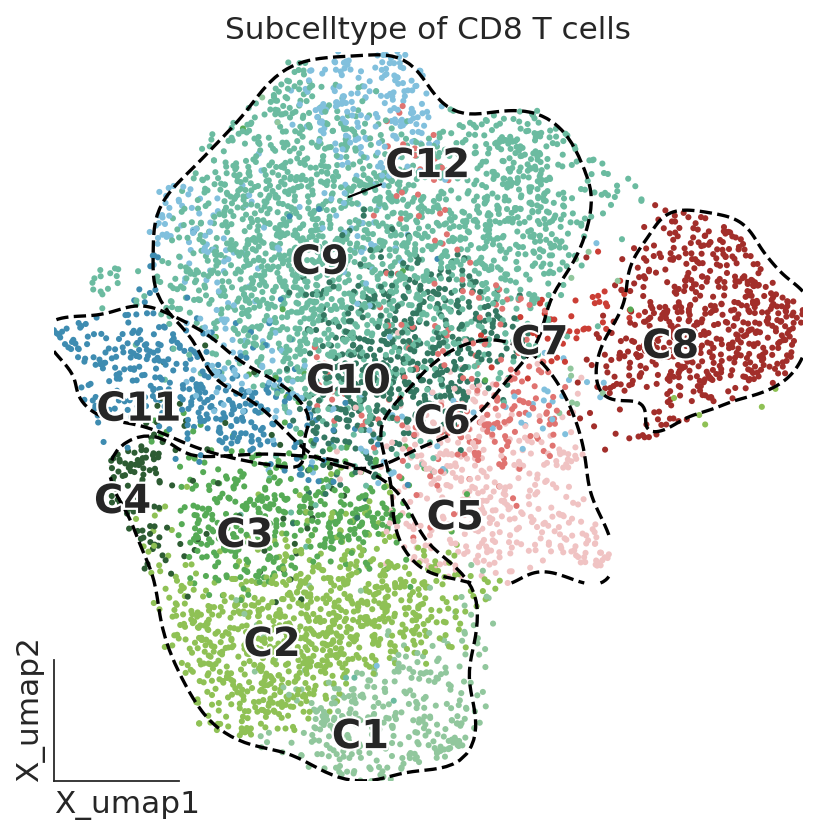

In [150]:
fig, ax = plt.subplots(figsize=(6,6))
adata_CD8.uns['Subcelltype_ID_colors']=adata_CD8.uns['Subcelltype_colors']
ov.pl.embedding(adata_CD8,
                  basis='X_umap',
                  color=['Subcelltype_ID'],title='Subcelltype of CD8 T cells',
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax,size=30
                 )
ov.pl.embedding_adjust(
    adata_CD8,
    groupby='Subcelltype_ID',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=18 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=adata_CD8,groupby='Subcelltype_ID',clusters=['C1','C2','C3','C4'],
       basis='X_umap',contour_threshold=0.25,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD8,groupby='Subcelltype_ID',clusters=['C9','C10','C12'],
       basis='X_umap',contour_threshold=0.25,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD8,groupby='Subcelltype_ID',clusters=['C5','C6'],
       basis='X_umap',contour_threshold=0.25,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD8,groupby='Subcelltype_ID',clusters=['C8',],
       basis='X_umap',contour_threshold=0.25,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD8,groupby='Subcelltype_ID',clusters=['C11',],
       basis='X_umap',contour_threshold=0.25,colors='#000000',
        linestyles='dashed',)
plt.savefig("Gastric/Figure/Figure2/Figure2_E.png",dpi=300,bbox_inches = 'tight')

In [136]:
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4
type_color_rna={
    'CD4.CAPG+.Tm':'C3',
    'CD4.CAPG+CREM-.Tm':'C4',
    'CD4.ADSL+.Tn':'C6',
    'CD4.IL21+.Tfh':'C7',
    'CD4.IL26+.Th17':'C9',
    'CD4.LAG3+.Treg':'C10',
    'CD4.TNF+.T':'C2',
    'CD4.TNFRSF9+.Treg':'C11',
    'CD4.TOX2+.Tfh':'C8',
    'CD4.Tn':'C1',
    'CD4.TMP1+.Tm':'C5',
}
adata_CD4.obs['Subcelltype_ID']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

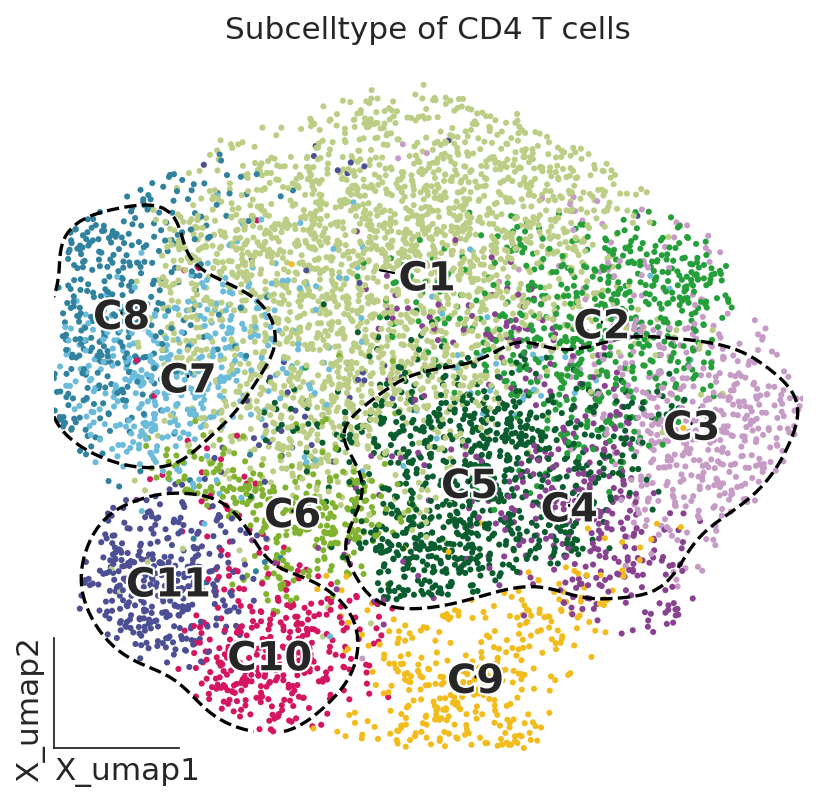

In [157]:
fig, ax = plt.subplots(figsize=(6,6))
adata_CD4.uns['Subcelltype_ID_colors']=adata_CD4.uns['Subcelltype_colors']

ov.pl.embedding(adata_CD4,
                  basis='X_umap',
                  color=['Subcelltype_ID'],title='Subcelltype of CD4 T cells',
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax,size=30
                 )
ov.pl.embedding_adjust(
    adata_CD4,
    groupby='Subcelltype_ID',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=18 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)
ov.pl.contour(ax=ax,adata=adata_CD4,groupby='Subcelltype_ID',clusters=['C3','C4','C5'],
       basis='X_umap',contour_threshold=0.3,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD4,groupby='Subcelltype_ID',clusters=['C7','C8'],
       basis='X_umap',contour_threshold=0.3,colors='#000000',
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata_CD4,groupby='Subcelltype_ID',clusters=['C10','C11'],
       basis='X_umap',contour_threshold=0.3,colors='#000000',
        linestyles='dashed',)


plt.savefig("Gastric/Figure/Figure2/Figure2_F.png",dpi=300,bbox_inches = 'tight')

In [11]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [205]:
adata_CD4.obs['Subcelltype_ID_type'].cat.categories.tolist()

['C1.CD4.Tn',
 'C6.CD4.ADSL+.Tn',
 'C2.CD4.TNF+.T',
 'C5.CD4.TMP1+.Tm',
 'C4.CD4.CAPG+CREM-.Tm',
 'C3.CD4.CAPG+.Tm',
 'C9.CD4.IL26+.Th17',
 'C7.CD4.IL21+.Tfh',
 'C8.CD4.TOX2+.Tfh',
 'C10.CD4.LAG3+.Treg',
 'C11.CD4.TNFRSF9+.Treg']

In [206]:
adata_CD4.uns['Subcelltype_colors']

array(['#BCCE85', '#81B330', '#249F3A', '#0A5D2F', '#89428F', '#c69bc6',
       '#F2BC1D', '#6BBBDA', '#31829F', '#D41661', '#4D4F95'],
      dtype=object)

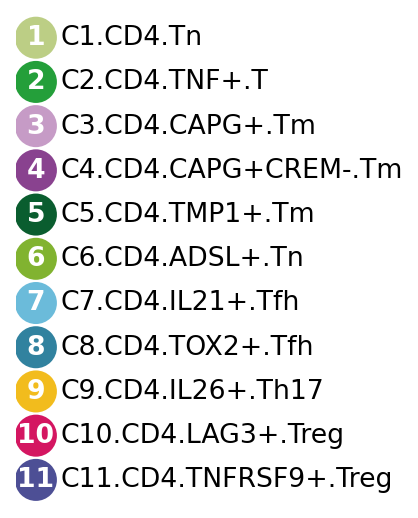

In [207]:
import matplotlib.pyplot as plt

# Set the numbers, cell types, and corresponding colors
numbers = ['1','2','3','4','5','6','7','8','9','10','11',]
celltypes = ['C1.CD4.Tn','C2.CD4.TNF+.T','C3.CD4.CAPG+.Tm','C4.CD4.CAPG+CREM-.Tm','C5.CD4.TMP1+.Tm','C6.CD4.ADSL+.Tn',
             'C7.CD4.IL21+.Tfh','C8.CD4.TOX2+.Tfh','C9.CD4.IL26+.Th17','C10.CD4.LAG3+.Treg','C11.CD4.TNFRSF9+.Treg']
colors = ['#BCCE85', '#249F3A','#c69bc6','#89428F',  '#0A5D2F','#81B330',
       '#6BBBDA', '#31829F','#F2BC1D', '#D41661', '#4D4F95']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed
ax.axis('off')  # Turn off the axis
ax.set_aspect('equal')  # Set the aspect of the plot to be equal

# Loop through each number, cell type, and color and create a circle and text
for y_val, (number, celltype, color) in enumerate(zip(numbers, celltypes, colors)):
    adjusted_y_val = len(numbers) - y_val  # Adjust y_val so C1 is at the top
    ax.add_artist(plt.Circle((0.45, adjusted_y_val), 0.45, color=color))  # Draw the circle
    ax.text(0.45, adjusted_y_val, str(number), color='white', weight='bold',
            fontsize=12, ha='center', va='center')  # Add the number inside the circle
    ax.text(1, adjusted_y_val, celltype, color='black', fontsize=12, va='center')  # Add the cell type next to the circle

# Set the limits of the figure
ax.set_xlim(0, 2)
ax.set_ylim(0.5, len(numbers) + 0.5)  # Adjust the ylim to properly fit the circles

# Display the plot
plt.savefig("Gastric/Figure/Figure2/CD4_legend.png",dpi=300,bbox_inches = 'tight')
plt.show()

In [75]:
adata_CD8.obs['Subcelltype_ID_type'].cat.categories.tolist()

['C1.CD8.GZMK+.Tn',
 'C2.CD8.GZMK+.early_Tem',
 'C3.CD8.GZMK+.Tem',
 'C4.CD8.CXCL13+.Termianl_Tex',
 'C5.CD8.FOS+JUN+.T-early_response',
 'C6.CD8.FOS+IL7R+.T-early_response',
 'C7.CD8.ISG+.T',
 'C8.CD8.MAIT',
 'C10.CD8.ZNF683+CXCR6-.Trm',
 'C9.CD8.ZNF683+CXCR6+.Trm',
 'C12.CD8.ZNF683-CXCR6+.Trm',
 'C11.CD8.KLRD1+TYROBP+.NK-like']

In [76]:
adata_CD8.uns['Subcelltype_colors']

array(['#91C79D', '#8FC155', '#56AB56', '#2D5C33', '#F0C3C3', '#E07370',
       '#CB3E35', '#A22E2A', '#347862', '#6BBBA0', '#81C0DD', '#3E8CB1'],
      dtype=object)

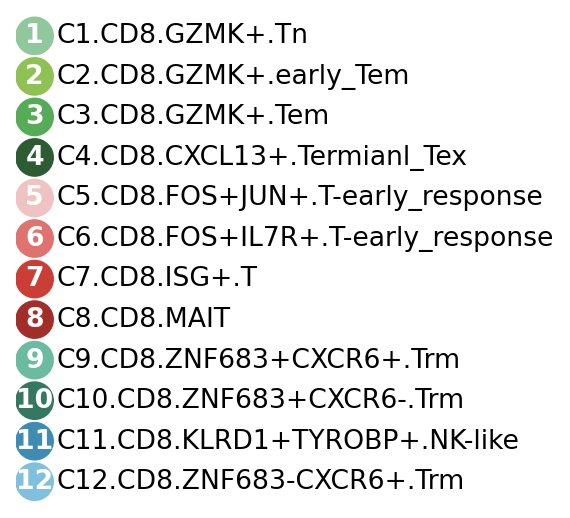

In [25]:
import matplotlib.pyplot as plt

# Set the numbers, cell types, and corresponding colors
numbers = ['1','2','3','4','5','6','7','8','9','10','11','12']
celltypes = ['C1.CD8.GZMK+.Tn',
 'C2.CD8.GZMK+.early_Tem',
 'C3.CD8.GZMK+.Tem',
 'C4.CD8.CXCL13+.Termianl_Tex',
 'C5.CD8.FOS+JUN+.T-early_response',
 'C6.CD8.FOS+IL7R+.T-early_response',
 'C7.CD8.ISG+.T',
 'C8.CD8.MAIT',
 'C9.CD8.ZNF683+CXCR6+.Trm',
 'C10.CD8.ZNF683+CXCR6-.Trm',
 'C11.CD8.KLRD1+TYROBP+.NK-like',
'C12.CD8.ZNF683-CXCR6+.Trm',]
colors = ['#91C79D', '#8FC155', '#56AB56', '#2D5C33', '#F0C3C3', '#E07370',
       '#CB3E35', '#A22E2A', '#6BBBA0', '#347862', '#3E8CB1','#81C0DD',]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed
ax.axis('off')  # Turn off the axis
ax.set_aspect('equal')  # Set the aspect of the plot to be equal

# Loop through each number, cell type, and color and create a circle and text
for y_val, (number, celltype, color) in enumerate(zip(numbers, celltypes, colors)):
    adjusted_y_val = len(numbers) - y_val  # Adjust y_val so C1 is at the top
    ax.add_artist(plt.Circle((0.45, adjusted_y_val), 0.45, color=color))  # Draw the circle
    ax.text(0.45, adjusted_y_val, str(number), color='white', weight='bold',
            fontsize=12, ha='center', va='center')  # Add the number inside the circle
    ax.text(1, adjusted_y_val, celltype, color='black', fontsize=12, va='center')  # Add the cell type next to the circle

# Set the limits of the figure
ax.set_xlim(0, 2)
ax.set_ylim(0.5, len(numbers) + 0.5)  # Adjust the ylim to properly fit the circles

# Display the plot
plt.savefig("Gastric/Figure/Figure2/CD8_legend.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Exhausted_cytotoxic pathway

In [108]:
adata = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
sc.pp.normalize_total(adata_raw, target_sum=1e4)
sc.pp.log1p(adata_raw)

normalizing counts per cell
    finished (0:00:00)


In [109]:

Exhausted_genes = ['TIGIT','CTLA4','PDCD1','LAYN','LAG3','CD244','CD160','HAVCR2']
Effector_memory_genes = ['RPF1','CD44','IFNG','TNF','GZMM','GZMK','GZMB','GZMH','FASLG','GZMA','NKG7']


sc.tl.score_genes(adata_raw, Exhausted_genes, score_name='Exhausted score')
sc.tl.score_genes(adata_raw, Effector_memory_genes, score_name='Effector/memory score')

computing score 'Exhausted score'
    finished: added
    'Exhausted score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)
computing score 'Effector/memory score'
    finished: added
    'Effector/memory score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


In [110]:
from sklearn.preprocessing import StandardScaler

pathway_list = ['Exhausted','Effector/memory']
for pathway_name in pathway_list:
    # 选择要标准化的列
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_raw.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_raw.obs[[pathway_name+' score']])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, '')])

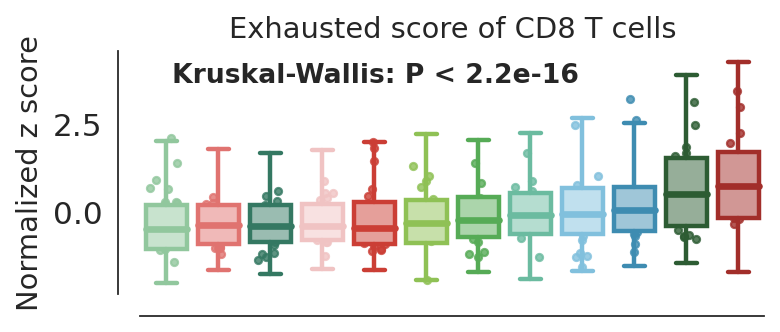

In [111]:
ov.pl.single_group_boxplot(adata_raw,groupby='Subcelltype',
             color='Z score of Exhausted',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype']).categories, adata.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Exhausted score of CD8 T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=True,
             save_pathway='Gastric/Figure/Figure2/Figure2_G_1.png'
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, '')])

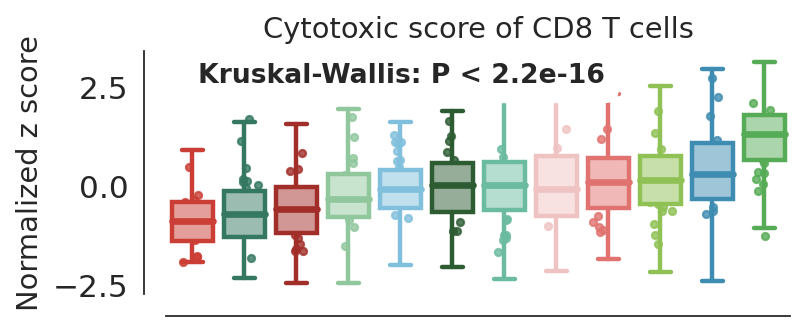

In [112]:
ov.pl.single_group_boxplot(adata_raw,groupby='Subcelltype',
             color='Z score of Effector/memory',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype']).categories, adata.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Cytotoxic score of CD8 T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=True,
             save_pathway='Gastric/Figure/Figure2/Figure2_G_2.png'
             )
plt.grid(False)

plt.xticks(rotation=90,fontsize=12)

In [118]:
help(ov.pl.single_group_boxplot)

Help on function single_group_boxplot in module omicverse.pl._single:

single_group_boxplot(adata, groupby: str = '', color: str = '', type_color_dict: dict = None, title: str = '', ylabel: str = '', kruskal_test: bool = False, figsize: tuple = (4, 4), x_ticks_plot: bool = False, legend_plot: bool = True, bbox_to_anchor: tuple = (1, 0.55), save: bool = False, point_number: int = 5, save_pathway: str = '', sort: bool = True, scatter_kwargs: dict = None, ax=None, fontsize=12)
    adata (AnnData object): The data object containing the information for plotting.
    groupby (str): The variable used for grouping the data.
    color (str): The variable used for coloring the data points.
    type_color_dict (dict): A dictionary mapping group categories to specific colors.
    title (str): The title for the plot.
    ylabel (str): The label for the y-axis.
    kruskal_test (bool): Whether to perform a Kruskal-Wallis test and display the p-value on the plot.
    figsize (tuple): The size of the 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, '')])

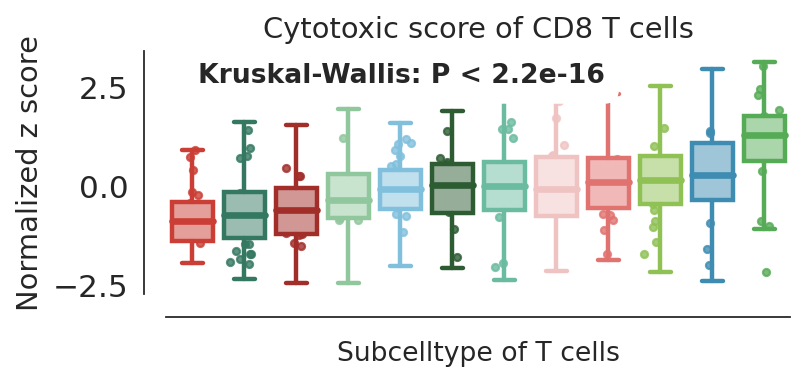

In [122]:
ov.pl.single_group_boxplot(adata_raw,groupby='Subcelltype',
             color='Z score of Effector/memory',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype']).categories, adata.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Cytotoxic score of CD8 T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             save_pathway='Gastric/Figure/Figure2/Figure2_G_2.png'
             )
plt.grid(False)
# 添加x轴标签
plt.xlabel('Subcelltype of T cells', fontsize=12)  # 设置x轴标签和字体大小
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/Figure2/Figure2_G_2.png",dpi=300,bbox_inches = 'tight')


In [123]:
adata = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
sc.pp.normalize_total(adata_raw, target_sum=1e4)
sc.pp.log1p(adata_raw)
Exhausted_genes = ['TIGIT','CTLA4','PDCD1','LAYN','LAG3','CD244','CD160','HAVCR2']
Effector_memory_genes = ['RPF1','CD44','IFNG','TNF','GZMM','GZMK','GZMB','GZMH','FASLG','GZMA','NKG7']


sc.tl.score_genes(adata_raw, Exhausted_genes, score_name='Exhausted score')
sc.tl.score_genes(adata_raw, Effector_memory_genes, score_name='Effector/memory score')
from sklearn.preprocessing import StandardScaler

pathway_list = ['Exhausted','Effector/memory']
for pathway_name in pathway_list:
    # 选择要标准化的列
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata_raw.obs['Z score of '+pathway_name] = scaler.fit_transform(adata_raw.obs[[pathway_name+' score']])

normalizing counts per cell
    finished (0:00:00)
computing score 'Exhausted score'
    finished: added
    'Exhausted score', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)
computing score 'Effector/memory score'
    finished: added
    'Effector/memory score', score of gene set (adata.obs).
    249 total control genes are used. (0:00:00)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, '')])

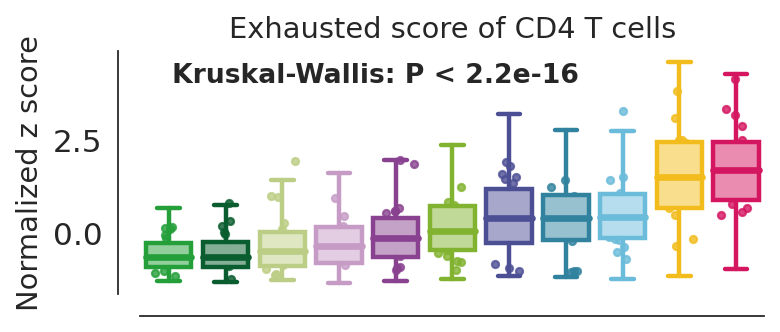

In [124]:
ov.pl.single_group_boxplot(adata_raw,groupby='Subcelltype',
             color='Z score of Exhausted',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype']).categories, adata.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Exhausted score of CD4 T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=True,
             save_pathway='Gastric/Figure/Figure2/Figure2_H_1.png'
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)

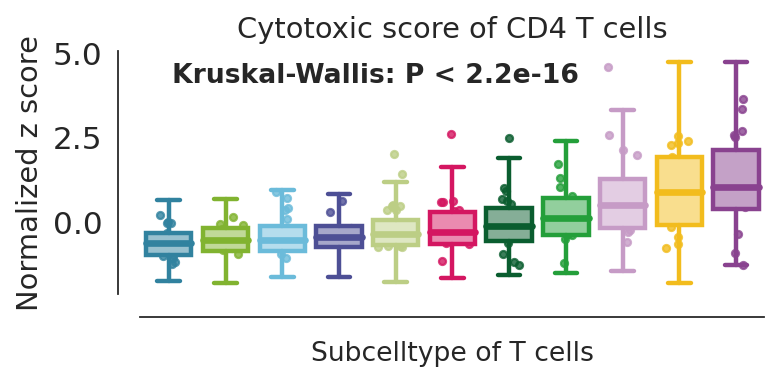

In [160]:
ov.pl.single_group_boxplot(adata_raw,groupby='Subcelltype',
             color='Z score of Effector/memory',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype']).categories, adata.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,2),
             kruskal_test=True,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Cytotoxic score of CD4 T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             save_pathway='Gastric/Figure/Figure2/Figure2_H_2.png'
             )
plt.grid(False)
plt.xlabel('Subcelltype of T cells', fontsize=12)  # 设置x轴标签和字体大小
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/Figure2/Figure2_H_2.png",dpi=300,bbox_inches = 'tight')


# CD8.Trm DEG

In [24]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata_CD8.obs.index]
adata_raw.obs = adata_CD8.obs
adata_raw.uns = adata_CD8.uns
adata_raw.obsm = adata_CD8.obsm
adata_raw

AnnData object with n_obs × n_vars = 6184 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [25]:
set(adata_raw.obs['Subcelltype'])

{'CD8.CXCL13+.Termianl_Tex',
 'CD8.FOS+IL7R+.T-early_response',
 'CD8.FOS+JUN+.T-early_response',
 'CD8.GZMK+.Tem',
 'CD8.GZMK+.Tn',
 'CD8.GZMK+.early_Tem',
 'CD8.ISG+.T',
 'CD8.KLRD1+TYROBP+.NK-like',
 'CD8.MAIT',
 'CD8.ZNF683+CXCR6+.Trm',
 'CD8.ZNF683+CXCR6-.Trm',
 'CD8.ZNF683-CXCR6+.Trm'}

In [26]:
CD8_Trm = adata_raw[adata_raw.obs['Subcelltype']=='CD8.ZNF683+CXCR6+.Trm']
adata = CD8_Trm
adata = adata[:,~adata.var_names.str.contains('RPS')]
adata = adata[:,~adata.var_names.str.contains('RPL')]
#normalize and high variable genes (HVGs) calculated
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]

adata.layers['lognorm'] = adata.X
adata

Begin robust gene identification
After filtration, 19487/32115 genes are kept. Among 19487 genes, 19487 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['HBB', 'IGKV4-1']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 5.6398632526397705 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 1982 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

In [27]:
dds=ov.bulk.pyDEG(adata.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=adata.obs[adata.obs['Sample']!='Neg'].index.tolist()
control_groups=adata.obs[adata.obs['Sample']=='Neg'].index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=0,
                   pval_threshold=0.01,
                   logp_max=20)


... drop_duplicates_index success
... Fold change threshold: 0


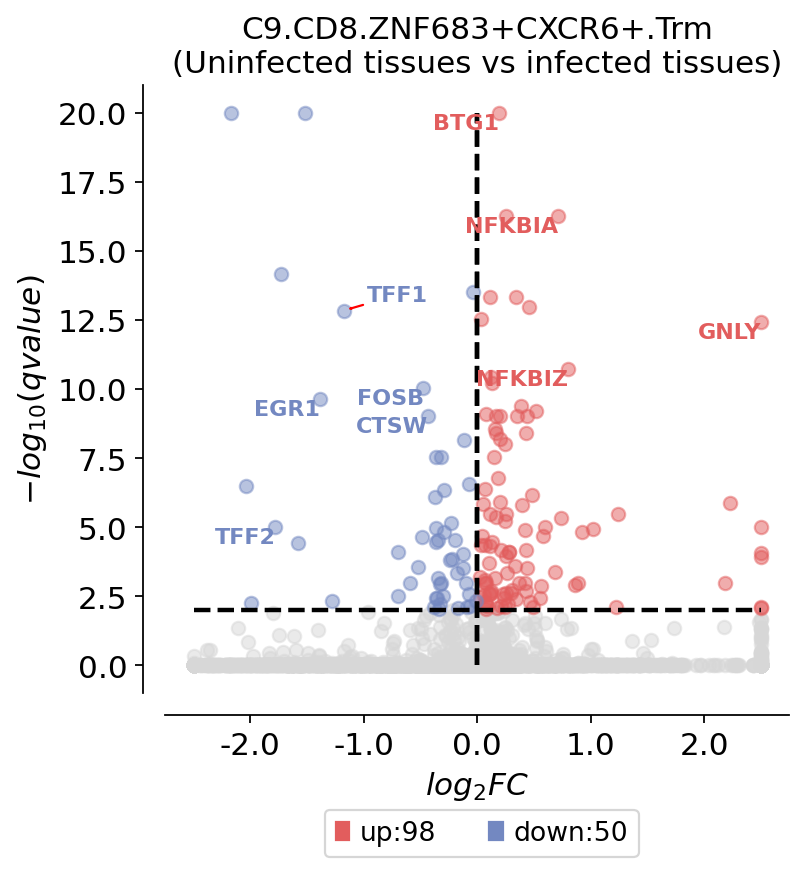

In [28]:
dds.result.loc[dds.result['log2FC']>2.5,'log2FC'] = 2.5
dds.result.loc[dds.result['log2FC']<-2.5,'log2FC'] = -2.5
#dds.result[dds.result['abs(log2FC)']>5] = 5
ax = dds.plot_volcano(title='C9.CD8.ZNF683+CXCR6+.Trm\n(Uninfected tissues vs infected tissues)',figsize=(5,5),
                 plot_genes_num=20,plot_genes_fontsize=10,legend_bbox=(0.78, -0.17),plot_genes=['BTG1','TFF1','FOSB','CTSW','EGR1',
                                                                                                'NFKBIA','NFKBIZ','GNLY','TFF2'])
plt.savefig('Gastric/Figure/Figure2/Figure2_I.png',dpi=300,bbox_inches = 'tight')

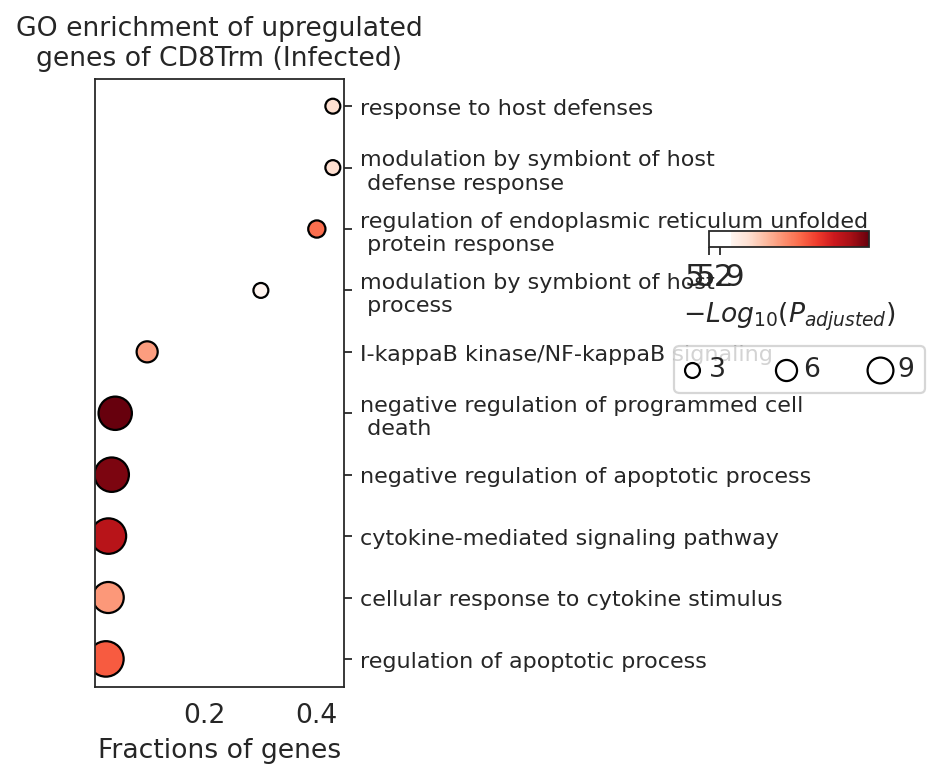

In [94]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO enrichment of upregulated\ngenes of CD8Trm (Infected)',
                          node_size=[3, 6, 9],
                          cax_loc=[2.10, 0.7, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.3, -10),node_diameter=15,custom_ticks=[5.2,5.9],
                        cmap='Reds')

In [95]:
enr = enr.sort_values(['Adjusted P-value'])
for i in enr['Term']:
    print(i)
    print(enr.loc[enr['Term']==i,'Adjusted P-value'].values[0])

negative regulation of programmed cell death (GO:0043069)
2.709383700944864e-07
negative regulation of apoptotic process (GO:0043066)
3.9690356242694327e-07
cytokine-mediated signaling pathway (GO:0019221)
1.3784690777795017e-06
regulation of apoptotic process (GO:0042981)
1.3823366894006963e-05
regulation of endoplasmic reticulum unfolded protein response (GO:1900101)
2.2217652533226666e-05
cellular response to cytokine stimulus (GO:0071345)
6.681660372223703e-05
I-kappaB kinase/NF-kappaB signaling (GO:0007249)
7.584176019601194e-05
modulation by symbiont of host defense response (GO:0052031)
0.00045901344723384114
response to host defenses (GO:0052200)
0.00045901344723384114
modulation by symbiont of host process (GO:0044003)
0.0014020503382623085
negative regulation of receptor signaling pathway via STAT (GO:1904893)
0.0016010802590402675
cellular response to molecule of bacterial origin (GO:0071219)
0.0016010802590402675
positive regulation of endoplasmic reticulum unfolded protein

In [96]:
def insert_newlines(s, n=50):
    if len(s) <= n:
        return s
    parts = s.split(' ')
    new_s = parts[0]
    for part in parts[1:]:
        if len(new_s) - new_s.rfind('\n') + len(part) + 1 > n:
            new_s += '\n' + part
        else:
            new_s += ' ' + part
    return new_s


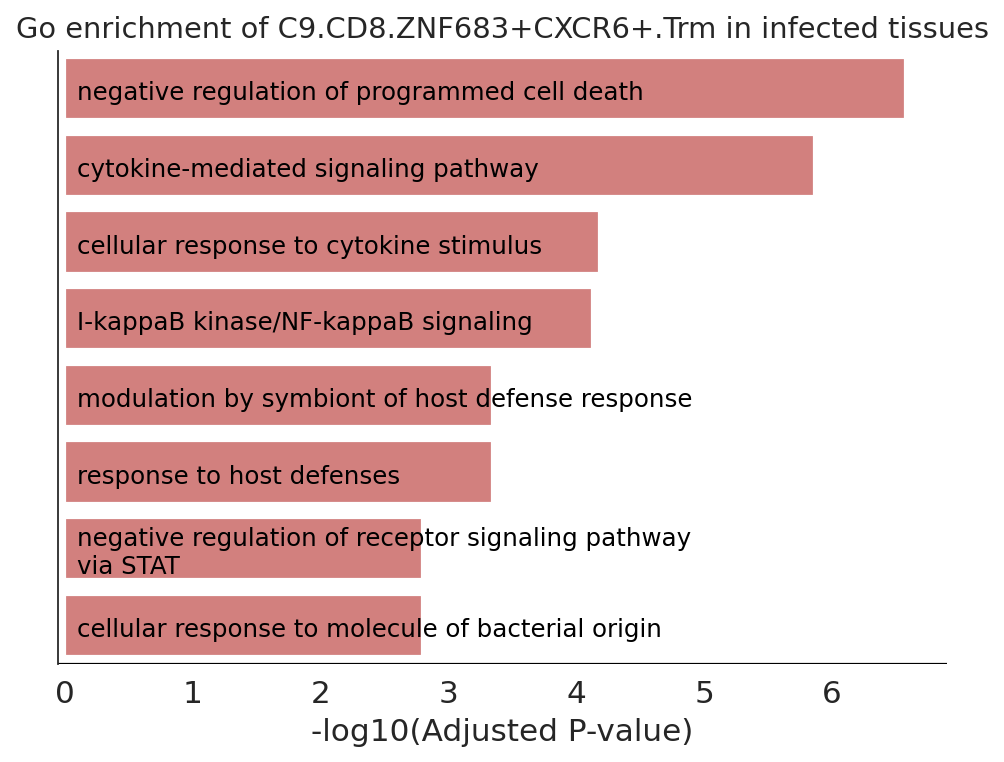

In [97]:
enr = enr[enr.loc[:,'Term'].isin(['negative regulation of programmed cell death (GO:0043069)',
                                  'cytokine-mediated signaling pathway (GO:0019221)',
                                  'I-kappaB kinase/NF-kappaB signaling (GO:0007249)',
                                  'response to host defenses (GO:0052200)',
                                  'modulation by symbiont of host defense response (GO:0052031)',
                                  'negative regulation of receptor signaling pathway via STAT (GO:1904893)',
                                  'cellular response to molecule of bacterial origin (GO:0071219)',
                                  'cellular response to cytokine stimulus (GO:0071345)',
])]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')


enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_sorted['Term'] = enr_sorted['Term'].apply(insert_newlines)

f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True) 
colors = [ov.pl.red_color[1]]*len(enr.index)  
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', fontsize=11,
            ha='left', va='center', color='black')

ax.axhline(y=7.5, color='black', linewidth=1)

ax.set_ylabel('')
#ax.xaxis.tick_top()
#ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  
ax.set_title('Go enrichment of C9.CD8.ZNF683+CXCR6+.Trm in infected tissues', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig('Gastric/Figure/Figure2/Figure2_J.png',dpi=300,bbox_inches = 'tight')
plt.show()

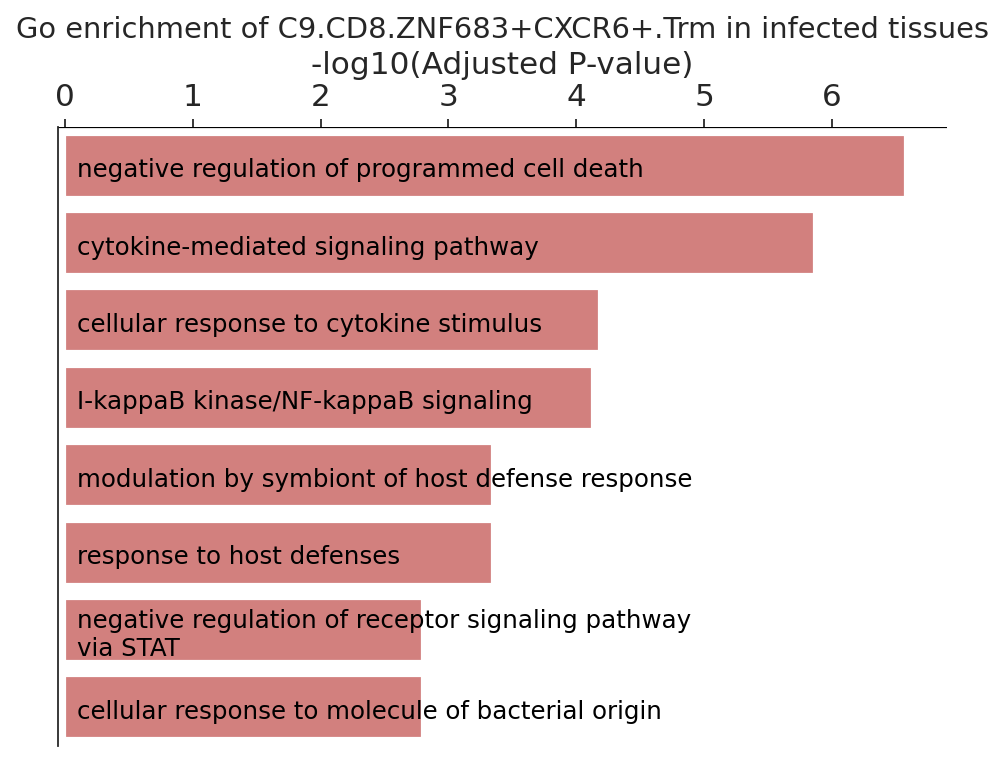

In [93]:
enr = enr[enr.loc[:,'Term'].isin(['negative regulation of programmed cell death (GO:0043069)',
                                  'cytokine-mediated signaling pathway (GO:0019221)',
                                  'I-kappaB kinase/NF-kappaB signaling (GO:0007249)',
                                  'response to host defenses (GO:0052200)',
                                  'modulation by symbiont of host defense response (GO:0052031)',
                                  'negative regulation of receptor signaling pathway via STAT (GO:1904893)',
                                  'cellular response to molecule of bacterial origin (GO:0071219)',
                                  'cellular response to cytokine stimulus (GO:0071345)',
])]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_sorted['Term'] = enr_sorted['Term'].apply(insert_newlines)

f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True) 
colors = [ov.pl.red_color[1]]*len(enr.index)
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', fontsize=11,
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  # 可以根据实际需要调整
ax.set_title('Go enrichment of C9.CD8.ZNF683+CXCR6+.Trm in infected tissues', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig('Gastric/Figure/Figure2/Figure2_J.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [23]:
enr_sorted

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction,-log10(Adjusted P-value)
484,CUSTOM22592645648256,negative regulation of programmed cell death,15/378,2.235465e-10,2.709384e-07,10.258943,NFKBIA;PIK3R1;MIF;PIM3;PTMA;XBP1;BCL3;UBA52;BC...,15.121374,2.328150,15,0.039683,6.567129
207,CUSTOM22592645648256,cytokine-mediated signaling pathway,17/618,3.412052e-09,1.378469e-06,7.190059,NFKBIA;PIK3R1;MIF;IL7R;IFITM2;B2M;UBA52;BIRC3;...,13.494537,1.972699,17,0.027508,5.860603
131,CUSTOM22592645648256,cellular response to cytokine stimulus,13/478,3.307753e-07,6.681660e-05,6.846211,PIK3R1;ZC3H12A;ZFP36;IFITM2;XBP1;CXCR4;UBA52;S...,9.613559,1.923695,13,0.027197,4.175116
29,CUSTOM22592645648256,I-kappaB kinase/NF-kappaB signaling,6/62,4.380300e-07,7.584176e-05,23.639138,NFKBIA;BCL3;UBA52;RELB;BIRC3;UBC,9.486861,3.162904,6,0.096774,4.120092
328,CUSTOM22592645648256,modulation by symbiont of host defense response,3/7,3.408516e-06,4.590134e-04,102.690944,B2M;UBA52;UBC,7.686431,4.631724,3,0.428571,3.338175
1148,CUSTOM22592645648256,response to host defenses,3/7,3.408516e-06,4.590134e-04,102.690944,B2M;UBA52;UBC,7.686431,4.631724,3,0.428571,3.338175
502,CUSTOM22592645648256,negative regulation of receptor signaling path...,3/11,1.585228e-05,1.601080e-03,66.958281,SOCS1;SOCS3;BCL3,6.437077,4.204070,3,0.272727,2.795587
165,CUSTOM22592645648256,cellular response to molecule of bacterial ori...,6/113,1.488122e-05,1.601080e-03,12.982168,ZC3H12A;PDE4B;ZFP36;HMGB2;XBP1;TNFAIP3,6.437077,2.563577,6,0.053097,2.795587


In [35]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata = ad.concat([adata_CD4,adata_CD8])
Exhausted_genes = ['TIGIT','CTLA4','PDCD1','LAYN','LAG3','CD244','CD160','HAVCR2']
Effector_memory_genes = ['RPF1','CD44','IFNG','TNF','GZMM','GZMK','GZMB','GZMH','FASLG','GZMA','NKG7']
sc.tl.score_genes(adata, Exhausted_genes, score_name='Exhausted score')
sc.tl.score_genes(adata, Effector_memory_genes, score_name='Effector/memory score')
pathway_list = ['Exhausted','Effector/memory']
for pathway_name in pathway_list:
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata.obs['Z score of '+pathway_name +' pathway'] = scaler.fit_transform(adata.obs[[pathway_name+' score']])

computing score 'Exhausted score'
    finished: added
    'Exhausted score', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'Effector/memory score'
    finished: added
    'Effector/memory score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


In [36]:
adata.uns['Sample_colors'] = adata_CD4.uns['Sample_colors']

In [37]:
set(adata.obs['Subcelltype'])

{'CD4.ADSL+.Tn',
 'CD4.CAPG+.Tm',
 'CD4.CAPG+CREM-.Tm',
 'CD4.IL21+.Tfh',
 'CD4.IL26+.Th17',
 'CD4.LAG3+.Treg',
 'CD4.TMP1+.Tm',
 'CD4.TNF+.T',
 'CD4.TNFRSF9+.Treg',
 'CD4.TOX2+.Tfh',
 'CD4.Tn',
 'CD8.CXCL13+.Termianl_Tex',
 'CD8.FOS+IL7R+.T-early_response',
 'CD8.FOS+JUN+.T-early_response',
 'CD8.GZMK+.Tem',
 'CD8.GZMK+.Tn',
 'CD8.GZMK+.early_Tem',
 'CD8.ISG+.T',
 'CD8.KLRD1+TYROBP+.NK-like',
 'CD8.MAIT',
 'CD8.ZNF683+CXCR6+.Trm',
 'CD8.ZNF683+CXCR6-.Trm',
 'CD8.ZNF683-CXCR6+.Trm'}

In [38]:
adata

AnnData object with n_obs × n_vars = 13000 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Exhausted score', 'Effector/memory score', 'Z score of Exhausted pathway', 'Z score of Effector/memory pathway'
    uns: 'Sample_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

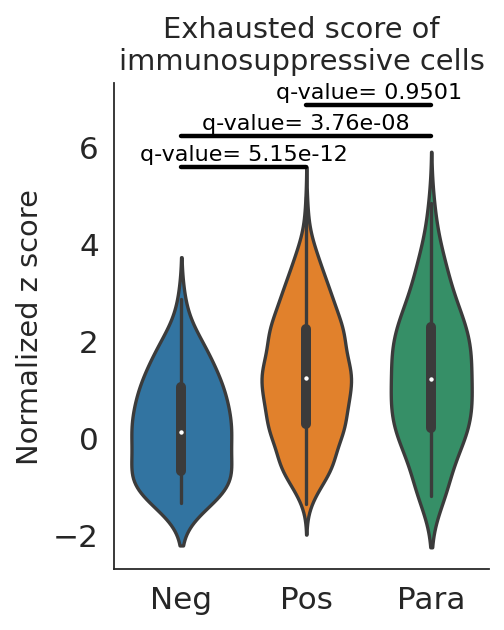

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
sns.set_style('white')

sample_data = adata[adata.obs['Subcelltype'].isin(['CD4.LAG3+.Treg',  'CD4.IL26+.Th17', 'CD8.MAIT','CD8.CXCL13+.Termianl_Tex',])]
plt.figure(figsize=(3, 4))

ax = sns.violinplot(data=sample_data.obs,
                    x="Sample", y="Z score of Exhausted pathway", palette=sample_data.uns['Sample_colors']).axes


ax.set_xlabel('')

sns.despine()

group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs['Z score of Exhausted pathway']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs['Z score of Exhausted pathway']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs['Z score of Exhausted pathway']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')

adjusted_p_values = p_adjusted[1]


def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'q-value= {p_value:.2e}' if p_value < 0.0001 else f'q-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.05, p_value_str, ha='center', va='bottom', color='black',fontsize=10)

add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.1)
add_stat_annotation(ax, [0, 2], adjusted_p_values[1], offset=0.2)
add_stat_annotation(ax, [1, 2], adjusted_p_values[2], offset=0.3)

plt.ylabel("Normalized z score",fontsize=13)

ax.set_xlabel('')
ax.set_title("Exhausted score of\nimmunosuppressive cells", fontsize=13)
sns.despine()
plt.savefig('Gastric/Figure/Figure2/Figure2_K.png',dpi=300,bbox_inches = 'tight')

plt.show()


In [43]:
adata

AnnData object with n_obs × n_vars = 13000 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Exhausted score', 'Effector/memory score', 'Z score of Exhausted pathway', 'Z score of Effector/memory pathway'
    uns: 'Sample_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

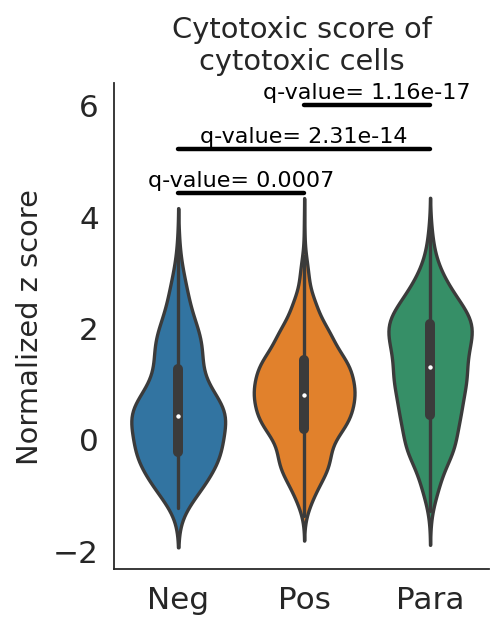

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

sample_data = adata[adata.obs['Subcelltype'].isin(['CD8.GZMK+.Tem', 'CD8.KLRD1+TYROBP+.NK-like', 'CD8.GZMK+.early_Tem', 'CD4.CAPG+CREM-.Tm'])]
plt.figure(figsize=(3, 4))

ax = sns.violinplot(data=sample_data.obs,
                    x="Sample", y="Z score of Effector/memory pathway", palette=sample_data.uns['Sample_colors']).axes

ax.set_xlabel('')

sns.despine()

group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs['Z score of Effector/memory pathway']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs['Z score of Effector/memory pathway']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs['Z score of Effector/memory pathway']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'q-value= {p_value:.2e}' if p_value < 0.0001 else f'q-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.05, p_value_str, ha='center', va='bottom', color='black',fontsize=10)

add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.1)
add_stat_annotation(ax, [0, 2], adjusted_p_values[1], offset=0.25)
add_stat_annotation(ax, [1, 2], adjusted_p_values[2], offset=0.4)

plt.ylabel("Normalized z score",fontsize=13)

ax.set_xlabel('')
ax.set_title("Cytotoxic score of\ncytotoxic cells", fontsize=13)
sns.despine()
plt.savefig('Gastric/Figure/Figure2/Figure2_L.png',dpi=300,bbox_inches = 'tight')

# 显示图形
plt.show()
